# **Data Preprocessing**
This document outlines the steps taken to preprocess the raw data before performing analysis or modeling tasks. The preprocessing steps are crucial for ensuring data quality, consistency, and suitability for further analysis.

In [1]:
%%capture
!pip install emoji

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sqlite3
import pandas as pd
import re
import emoji
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split


# clean_text Function Documentation

## Description
The `clean_text` function is designed to preprocess and clean Arabic text data. It removes URLs, non-Arabic characters, digits, diacritics, repeated characters, emojis, specific punctuation, and stopwords. The function ensures that the text data is ready for further analysis or modeling tasks.

## Parameters
- `text` (str): The input text to be cleaned.

## Returns
- `cleaned_text` (str): The cleaned and preprocessed text.

## Cleaning Steps
1. **Remove URLs, Hashtags, Mentions**:
   - Uses regular expressions to remove URLs, hashtags, and mentions from the text.
   
2. **Remove Non-Arabic Characters**:
   - Removes any characters that are not part of the Arabic Unicode range (\u0600-\u06FF), except spaces.
   
3. **Remove Digits**:
   - Removes any digits from the text.
   
4. **Normalize Arabic Text**:
   - Normalizes Arabic text by replacing certain characters with their standard equivalents (e.g., 'إ' with 'ا').
   
5. **Remove Diacritics (Tashkeel)**:
   - Removes diacritics (Tashkeel) from the text.
   
6. **Remove Repeated Characters**:
   - Removes consecutive repeated characters in the text.
   
7. **Demjize Emojis**:
   - Converts emojis to text using the `emoji.demojize` function and removes colons.
   
8. **Remove Specific Punctuation**:
   - Removes specific Arabic punctuation marks (، ؟ ! ؛) from the text.
   
9. **Tokenize Text**:
   - Splits the text into tokens (words).
   
10. **Remove Stopwords**:
    - Removes stopwords (commonly used words that do not contribute much to the meaning of the text) from the text.
    
11. **Rejoin Tokens**:
    - Rejoins the cleaned tokens to form the cleaned text.
    
12. **Clean Up Extra Spaces**:
    - Removes any extra spaces from the cleaned text.




In [3]:
def clean_text(text):
    # Remove URLs, hashtags, mentions
    cleaned_text = re.sub(r'(https?://\S+|www\.\S+|#\S+|@\S+)', '', text)

    # Remove non-Arabic characters except spaces
    cleaned_text = re.sub(r'[^\u0600-\u06FF\s]', '', cleaned_text)

    # Remove digits
    cleaned_text = re.sub(r'\d+', '', cleaned_text)

    # Normalize Arabic text
    cleaned_text = cleaned_text.translate(normalization_map)

    # Remove diacritics (Tashkeel)
    cleaned_text = re.sub(r'[\u0610-\u061A\u064B-\u065F\u0670\u06D6-\u06DC\u06DF-\u06E8\u06EA-\u06ED]', '', cleaned_text)

    # Remove repeated characters
    cleaned_text = re.sub(r'(.)\1+', r'\1', cleaned_text)

    # Demojize (convert emojis to text)
    cleaned_text = emoji.demojize(cleaned_text)
    cleaned_text = cleaned_text.replace(":", "")

    # Remove specific punctuation
    cleaned_text = re.sub(r'[،؟!؛]', '', cleaned_text)

    # Tokenize text
    tokens = cleaned_text.split()

    # Remove stopwords
    tokens = [word for word in tokens if word not in arabic_stopwords]

    # Rejoin tokens to form cleaned text
    cleaned_text = ' '.join(tokens)

    # Clean up any extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text



In [4]:

# Download Arabic stopwords if not already downloaded
nltk.download('stopwords')

# Arabic stopwords list
arabic_stopwords = set(stopwords.words('arabic'))

# Manually define normalization mappings
normalization_map = str.maketrans({
    'إ': 'ا', 'أ': 'ا', 'آ': 'ا', 'ى': 'ي', 'ة': 'ه',
    'ؤ': 'و', 'ئ': 'ي', 'ء': ''
})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
def load_and_preprocess_data(id_text_path, id_dialect_path):
    # Load data from CSV files
    id_text_df = pd.read_csv(id_text_path)
    id_dialect_df = pd.read_csv(id_dialect_path)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(id_text_df['text'], id_dialect_df['dialect'], test_size=0.2, random_state=42)

    # Apply cleaning function to the text data
    X_train_cleaned = X_train.apply(clean_text)
    X_test_cleaned = X_test.apply(clean_text)

    return X_train_cleaned, X_test_cleaned, y_train, y_test


In [7]:
id_text_path = 'id_text.csv'
id_dialect_path = 'id_dialect.csv'
X_train, X_test, y_train, y_test = load_and_preprocess_data(id_text_path, id_dialect_path)

In [8]:
X_train

57485                                الدنيا دي الحلو والوحش
61118     انا بقيت اعمل كده علي فكره ليه اوجع ايدي تقليب...
48452     البوست بتاع خافير سولانا طلع انه هاكر تركي اخت...
95030                                           احلي دي ايه
96136                                  حبيبي قدها كبير واله
                                ...                        
119879                      كلمه تانيه بعتلك الصوره الاصليه
103694    تخرسوا شويه ولاد الناقه خرست هيقولوا الي معرصش...
131932                    يوم بتفيق علي مشكله وبتنام عمشكله
146867            كلامك سليم الناس لازم تعرف الخلاف علي شنو
121958             اه تحديني بالكميه يوم سحبت حسابي وسكرتوا
Name: text, Length: 118180, dtype: object

In [9]:
X_test

41931     اله اعلم مسمعتهاش ومكنسمعش ليه انا شفت بلي راه...
48269                                   طب ايه مش يالا بينا
113699        اولع بنفسي ابخش عيني اشرب ديتول ارمش ازاز ايه
112678    نداك بهالوقت ليلي الصبح مش رابط الوليد بن طلال...
71159     ايه ده احنا رجعنا تاني لزمن السطو علي محلات ال...
                                ...                        
57553     الحاجه فالبيت عامله ملوخيه وعايز اجيب حاجه بره...
91982                         يابني بتكلم ماتش الزمالك اصحي
55260     تابعوا انتخابات اسرايل عشان تعرفوا ان الي يمشي...
110926    المهم ماتقول يجي ريس جمهوريه او ريس مجلس نواب ...
118439    سوال عم يـعن علي بالي ميشو معوض حليفنا نهاركم ...
Name: text, Length: 29545, dtype: object

In [10]:
y_train

57485     EG
61118     EG
48452     EG
95030     EG
96136     EG
          ..
119879    LB
103694    EG
131932    LB
146867    SD
121958    LB
Name: dialect, Length: 118180, dtype: object

In [11]:
y_test

41931     MA
48269     EG
113699    LB
112678    LB
71159     EG
          ..
57553     EG
91982     EG
55260     EG
110926    LB
118439    LB
Name: dialect, Length: 29545, dtype: object

In [15]:
X_train.to_csv('X_train.csv', index=False,encoding='utf-8-sig')
X_test.to_csv('X_test.csv', index=False,encoding='utf-8-sig')
y_train.to_csv( 'y_train.csv', index=False,encoding='utf-8-sig')
y_test.to_csv('y_test.csv', index=False,encoding='utf-8-sig')


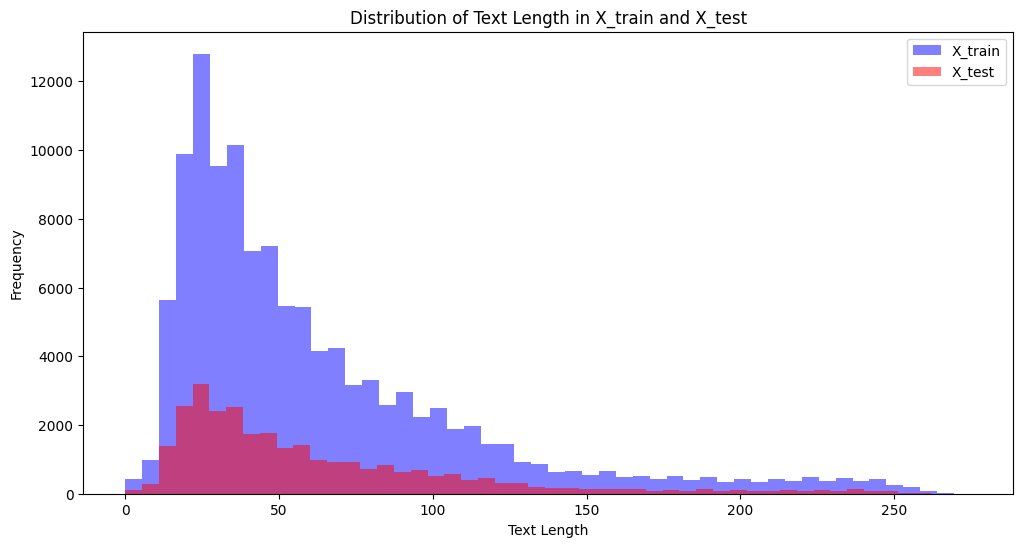

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(X_train.str.len(), bins=50, alpha=0.5, color='blue', label='X_train')
plt.hist(X_test.str.len(), bins=50, alpha=0.5, color='red', label='X_test')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length in X_train and X_test')
plt.legend()
plt.show()


<ipython-input-34-6a40f8d6c53f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


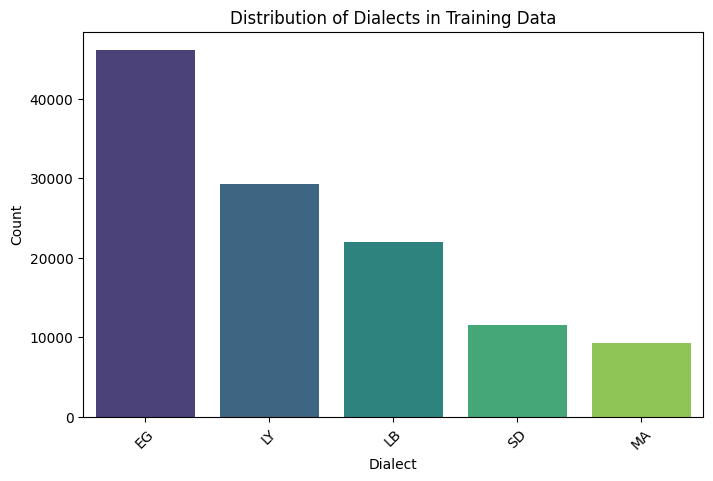

In [ ]:
from wordcloud import WordCloud
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Dialects in Training Data')
plt.xlabel('Dialect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




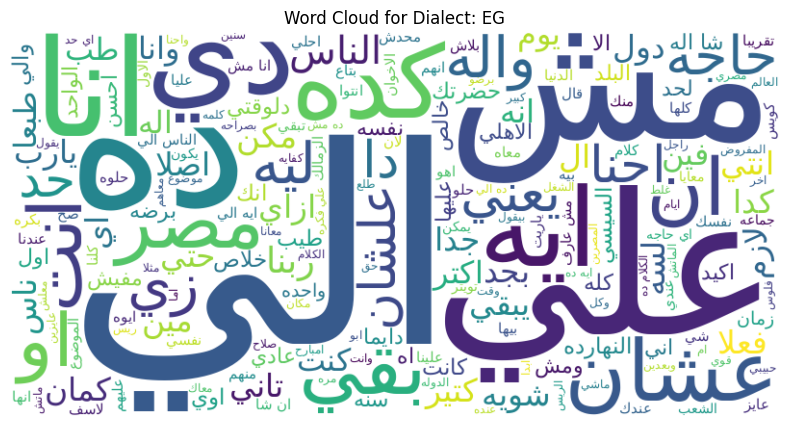

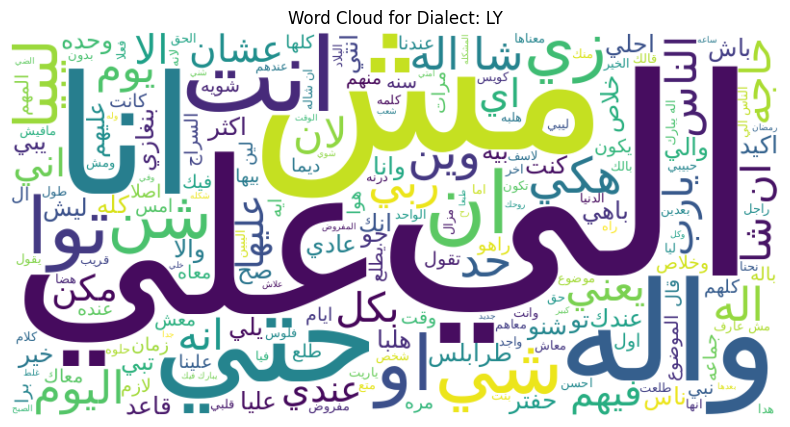

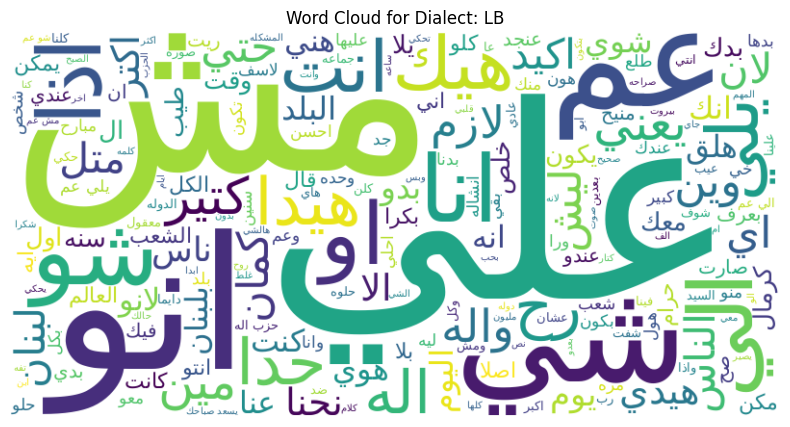

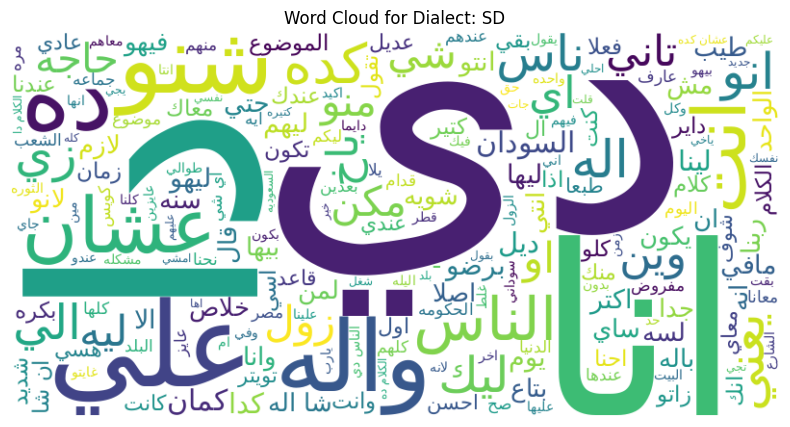

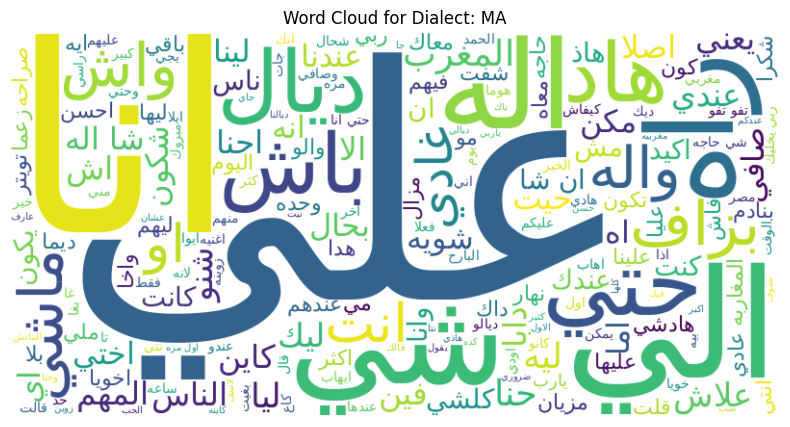

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to the font file
font_path = '/content/DejaVuSans.ttf'

# Function to create and display the word cloud for a specific dialect
def create_wordcloud(text, dialect):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Dialect: {dialect}')
    plt.axis('off')
    plt.show()

# Create word clouds for each dialect individually
for dialect in y_train.unique():
    # Get text data for the current dialect
    text = ' '.join(X_train[y_train == dialect])
    create_wordcloud(text, dialect)
